In [2]:
#Inputs

In [57]:
%matplotlib inline
from matplotlib import pyplot as pl
import numpy as np

# Import a library that contains soil moisture properties and functions
import vanGenuchten as vg

# Import ODE solvers
from scipy.interpolate import interp1d
from scipy.integrate import odeint

# Select which soil properties to use
p=vg.HygieneSandstone()

In [58]:
def RichardsModel(psi,t,dz,n,p,vg,qTop,qBot,psiTop,psiBot):
       
    # Basic properties:
    C=vg.CFun(psi,p)
   
    # initialize vectors:
    q=np.zeros(n+1)
    
    # Upper boundary
    if qTop == []:
        KTop=vg.KFun(np.zeros(1)+psiTop,p)
        q[n]=-KTop*((psiTop-psi[n-1])/dz*2+1)
    else:
        q[n]=qTop
    
    # Lower boundary
    if qBot == []:
        if psiBot == []:
            # Free drainage
            KBot=vg.KFun(np.zeros(1)+psi[0],p)
            q[0]=-KBot
        else:
            # Type 1 boundary
            KBot=vg.KFun(np.zeros(1)+psiBot,p)
            q[0]=-KBot*((psi[0]-psiBot)/dz*2+1.0)    
    else:
        # Type 2 boundary
        q[0]=qBot
    
    # Internal nodes
    i=np.arange(0,n-1)
    Knodes=vg.KFun(psi,p)
    Kmid=(Knodes[i+1]+Knodes[i])/2.0
    
    j=np.arange(1,n)
    q[j]=-Kmid*((psi[i+1]-psi[i])/dz+1.0)
    
    
    
    # Continuity
    i=np.arange(0,n)
    dpsidt=(-(q[i+1]-q[i])/dz)/C
    
    
    return dpsidt

In [59]:
qTop=-0.01
qBot=[]
psiTop=[]
psiBot=[]

# Grid in space
dz=0.01
ProfileDepth=1
z=np.arange(dz/2.0,ProfileDepth,dz)
n=z.size

# Grid in time
t_final=1440
dt=1
t= np.arange(0,t_final, dt)

# Initial conditions
psi0=-z

# Solve
psi=odeint(RichardsModel,psi0,t,args=(dz,n,p,vg,qTop,qBot,psiTop,psiBot),mxstep=5000000);

print("Model run successfully", psi)

Model run successfully [[-0.005      -0.015      -0.025      ... -0.975      -0.985
  -0.995     ]
 [-1.47628892 -1.4763215  -1.47638221 ... -1.4848052  -1.48480851
  -1.48481151]
 [-1.48479232 -1.48479253 -1.48479292 ... -1.48483157 -1.48483157
  -1.48483156]
 ...
 [-1.4848316  -1.4848316  -1.4848316  ... -1.4848316  -1.4848316
  -1.4848316 ]
 [-1.4848316  -1.4848316  -1.4848316  ... -1.4848316  -1.4848316
  -1.4848316 ]
 [-1.4848316  -1.4848316  -1.4848316  ... -1.4848316  -1.4848316
  -1.4848316 ]]


In [60]:
theta=vg.thetaFun(psi,p)

# Get total profile storage
S=theta.sum(axis=1)*dz

# Get change in storage [dVol]
dS=np.zeros(S.size)
dS[1:]=np.diff(S)/(t[1]-t[0])

# Get infiltration flux
if qTop == []:
    KTop=vg.KFun(np.zeros(1)+psiTop,p)
    qI=-KTop*((psiTop-psi[:,n-1])/dz*2+1)
else:
    qI=np.zeros(t.size)+qTop
    
# Get discharge flux
if qBot == []:
    if psiBot == []:
        # Free drainage
        KBot=vg.KFun(psi[:,0],p)
        qD=-KBot
    else:
        # Type 1 boundary
        KBot=vg.KFun(np.zeros(1)+psiBot,p)
        qD=-KBot*((psi[:,0]-psiBot)/dz*2+1.0)
else:
    qD=np.zeros(t.size)+qBot
    

In [61]:
theta = np.array(theta)

In [62]:
theta.shape

(1440, 100)

In [111]:
z=np.array(z)
z.shape

()

In [63]:
L=1 #meter
n=100
T0=20.6 #celcius
T1s=33.5
T2s=20.6
dx=L/n
k=48 
rho=1.60
t_final=1440 #hour
dt=1 #minute

In [16]:
alpha=48/(0.5*2.1*10**6 + 0.5*0.0012*10**6)
alpha

array([0.25      , 0.25      , 0.25      , 0.24999986, 0.24999813,
       0.24998494, 0.24991448, 0.24962239, 0.24862715, 0.24577213,
       0.23895414, 0.2260454 , 0.20789382, 0.18944783, 0.17521678,
       0.1660282 , 0.16059552, 0.15747948, 0.15569246, 0.15465344,
       0.15403751, 0.15366461, 0.15343408, 0.15328868, 0.15319521,
       0.15313407, 0.15309341, 0.15306595, 0.15304715, 0.1530341 ,
       0.15302492, 0.1530184 , 0.15301372, 0.15301032, 0.15300783,
       0.15300598, 0.15300461, 0.15300357, 0.15300279, 0.15300219,
       0.15300173, 0.15300138, 0.1530011 , 0.15300089, 0.15300072,
       0.15300058, 0.15300047, 0.15300039, 0.15300032, 0.15300026])

In [64]:
x=np.linspace(dx/2, L-dx/2, n)
t= np.arange(0,t_final, dt)
T=np.ones(n)*T0
dTdt= np.empty(n)


In [55]:
len(t)

1440

In [65]:
for j in range(1,len(t)):
    alpha=48/(0.5*2.1*10**6 + theta[j]*0.0012*10**6)
    for i in range(1,n-1):
        dTdt[i]= alpha[i]*(-(T[i]- T[i-1])/ dx**2+(T[i+1]-T[i])/dx**2)
    dTdt[0]= alpha[i]*(-(T[0]- T1s)/ dx**2+(T[1]-T[0])/dx**2)
    dTdt[n-1]= alpha[i]*(-(T[n-1]- T[n-2])/ dx**2+(T2s-T[n-1])/dx**2)
    T=T+dTdt*dt
#     pl.scatter(x,T,label='time (in seconds):'+ str(round(j*dt,1)))
#     #pl.scatter([-dx/2, L+dx/2],[Tb1,Tb2])
#     plot_visuals()
#     pl.pause(dt)
# pl.show()

In [34]:
def plot_visuals():
	pl.figure(1)
	pl.axis([-dx, L+dx, 0, 50])
	pl.xlabel('Distance (in m)')
	pl.ylabel('Temp (in C)')
	pl.grid()
	pl.legend()

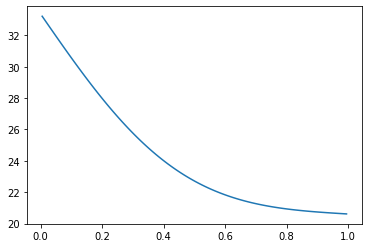

In [66]:
pl.plot(x,T)

In [67]:
import math as m

In [113]:
def analy(z):
    t=1440
    lamda=2
    C_w =4.17*10**6
    C=2.1*10**6
    rho_w =1000
    rho = 2630
    q_f =4*10**(-7)
    tau=1440
    A=5
    T_inf =20
    T1= (m.pi* C*rho)/(lamda*tau)
    T2= (q_f*C_w * rho_w)/(2*lamda)
    a=((T1**2+ ((T2**4)**4)/4)**0.5 + (T2**2)/ 2)**0.5 - T2
    b=((T1**2+ ((T2**4)**4)/4)**0.5 + (T2**2)/ 2)**0.5
    T_zt = A*m.exp(-a*-z)*m.sin(((2*m.pi*t)/tau)-b*z) + T_inf
    return(T_zt)

In [112]:
t=360
lamda=2
C_w =4.17*10**6
C=2.1*10**6
rho_w =1000
rho = 2630
q_f =4*10**(-7)
tau=1440
A=5
T_inf =20
z=0
T1= (m.pi* C*rho)/(lamda*tau)
T2= (q_f*C_w * rho_w)/(2*lamda)
a=((T1**2+ ((T2**4)**4)/4)**0.5 + (T2**2)/ 2)**0.5 - T2
b=((T1**2+ ((T2**4)**4)/4)**0.5 + (T2**2)/ 2)**0.5
T_zt = A*m.exp(-a*-z)*m.sin(((2*m.pi*t)/tau)-b*z) + T_inf

In [105]:
T_zt = A*m.sin((2*m.pi*t)/tau)+20
T_zt

20.0

In [114]:
dz=0.01
ProfileDepth = 1.5
z1=np.arange(dz,ProfileDepth,dz)
Tem=[]
for i in z1:
    k=analy(i)
    Tem.append(k)

OverflowError: math range error

In [136]:
def fun(z,j):   
    omega= (2*m.pi)/1440
    K=48/(0.5*2.1*10**6 + theta[1439][j]*0.0012*10**6)
    D= (2*K / omega)**0.5
    B_z=z/D
    A_z= 5*m.exp(-z/D)
    T= 20- A_z*m.sin(omega*1440 + B_z)
    
    return T

In [137]:
L=1.5 #meter
n=100
T0=20 #celcius
T1s=26
T2s=20
dx=L/n
x=np.linspace(dx/2, L-dx/2, n)
final=[];j=0
for i in x:
    final.append(fun(i,j))
    j=j+1

(14.0, 24.0)

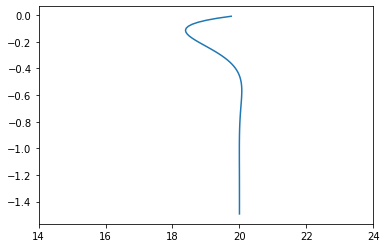

In [138]:
pl.plot(final,-x)
pl.xlim([14, 24])


ValueError: x and y must have same first dimension, but have shapes (0,) and (149,)

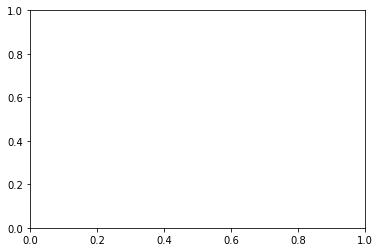

In [115]:
pl.plot(Tem,z1)